<a href="https://colab.research.google.com/github/ai-pallikoodam/pytorch-home/blob/main/01_Exer_Vision_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -Uqq torch timm fastai

     |████████████████████████████████| 776.3 MB 13 kB/s 
     |████████████████████████████████| 509 kB 64.4 MB/s 
     |████████████████████████████████| 225 kB 72.4 MB/s 


In [2]:
from fastai.vision.all import *
import timm

In [6]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/pug_160.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_155.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_40.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_63.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_164.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_87.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_117.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_148.jpg')...]

In [7]:
dls = ImageDataLoaders.from_name_func('.',
      get_image_files(path), valid_pct=0.2, seed=42,
      label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
      item_tfms=Resize(224))

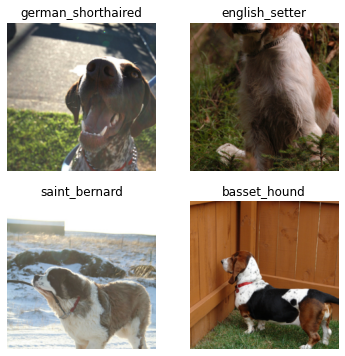

In [8]:
dls.show_batch(max_n=4)

In [9]:
timm.list_models('convnext*')

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_hnf',
 'convnext_nano_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [10]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.125316,0.225398,0.078484,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.270409,0.192555,0.060893,00:56
1,0.204169,0.163410,0.057510,00:54
2,0.130250,0.155014,0.054127,00:55


In [ ]:
learn.export('model.pkl')

# Experiements - 1

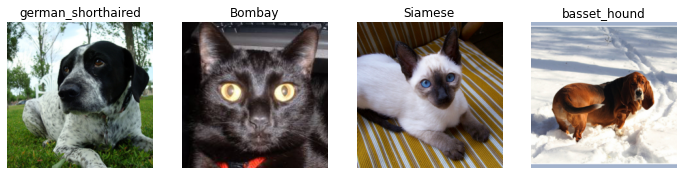

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
dogs = dls.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

IndexError: ignored

In [13]:
dogs = dls.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

IndexError: ignored

In [ ]:
dogs = dls.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
dogs = dls.new(item_tfms=Resize(128) batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
dogs = dls.new(item_tfms=Resize(128) batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

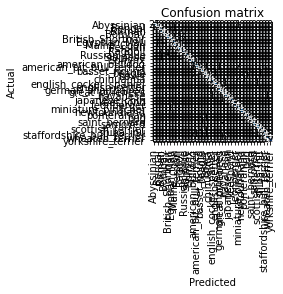

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17, 4))

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner